# AIPI 590 - XAI | Explainable Techniques 1
### Machine Learning Court
### Mariam Khan

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/main/machine_learning_court.ipynb)

## 🩺 Case 2: Tumor Misclassification – Breast Cancer Dataset
#### 🔍 Scenario
Patient X received a benign classification from an AI tumor diagnostic tool and was not referred for a biopsy. Months later, the tumor was diagnosed as malignant. The model’s output is now under scrutiny.

#### 🟥 Prosecution
Use explanation tools to evaluate how the model arrived at this decision. Consider whether any key medical indicators might have been overlooked or minimized.

In [ ]:
!pip install lime


In [ ]:
# 🧬 Case 2: Tumor Misclassification (Breast Cancer Dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay


# Load dataset
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc['target'] = data.target  # 0 = malignant, 1 = benign

# Train/test split
X = df_bc.drop("target", axis=1)
y = df_bc["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_bc = RandomForestClassifier(random_state=42)
model_bc.fit(X_train, y_train)
print(classification_report(y_test, model_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# 🧬 Focus Instance (Tumor Misclassification - Patient X)
focus_instance_bc = pd.DataFrame([{
    "mean radius": 13.80,
    "mean texture": 15.79,
    "mean perimeter": 90.43,
    "mean area": 584.1,
    "mean smoothness": 0.1007,
    "mean compactness": 0.1280,
    "mean concavity": 0.07789,
    "mean concave points": 0.05069,
    "mean symmetry": 0.1662,
    "mean fractal dimension": 0.06566,
    "radius error": 0.4101,
    "texture error": 1.074,
    "perimeter error": 2.635,
    "area error": 40.14,
    "smoothness error": 0.00541,
    "compactness error": 0.02204,
    "concavity error": 0.01664,
    "concave points error": 0.01185,
    "symmetry error": 0.02095,
    "fractal dimension error": 0.004902,
    "worst radius": 16.57,
    "worst texture": 20.86,
    "worst perimeter": 110.3,
    "worst area": 812.4,
    "worst smoothness": 0.1411,
    "worst compactness": 0.3542,
    "worst concavity": 0.2779,
    "worst concave points": 0.1383,
    "worst symmetry": 0.2589,
    "worst fractal dimension": 0.1030
}])

# Run prediction
pred = model_bc.predict(focus_instance_bc)
print("Prediction for Patient X:", "Benign → No Biopsy" if pred[0] == 1 else "Malignant → Action Needed")


Prediction for Patient X: Benign → No Biopsy


###LIME

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


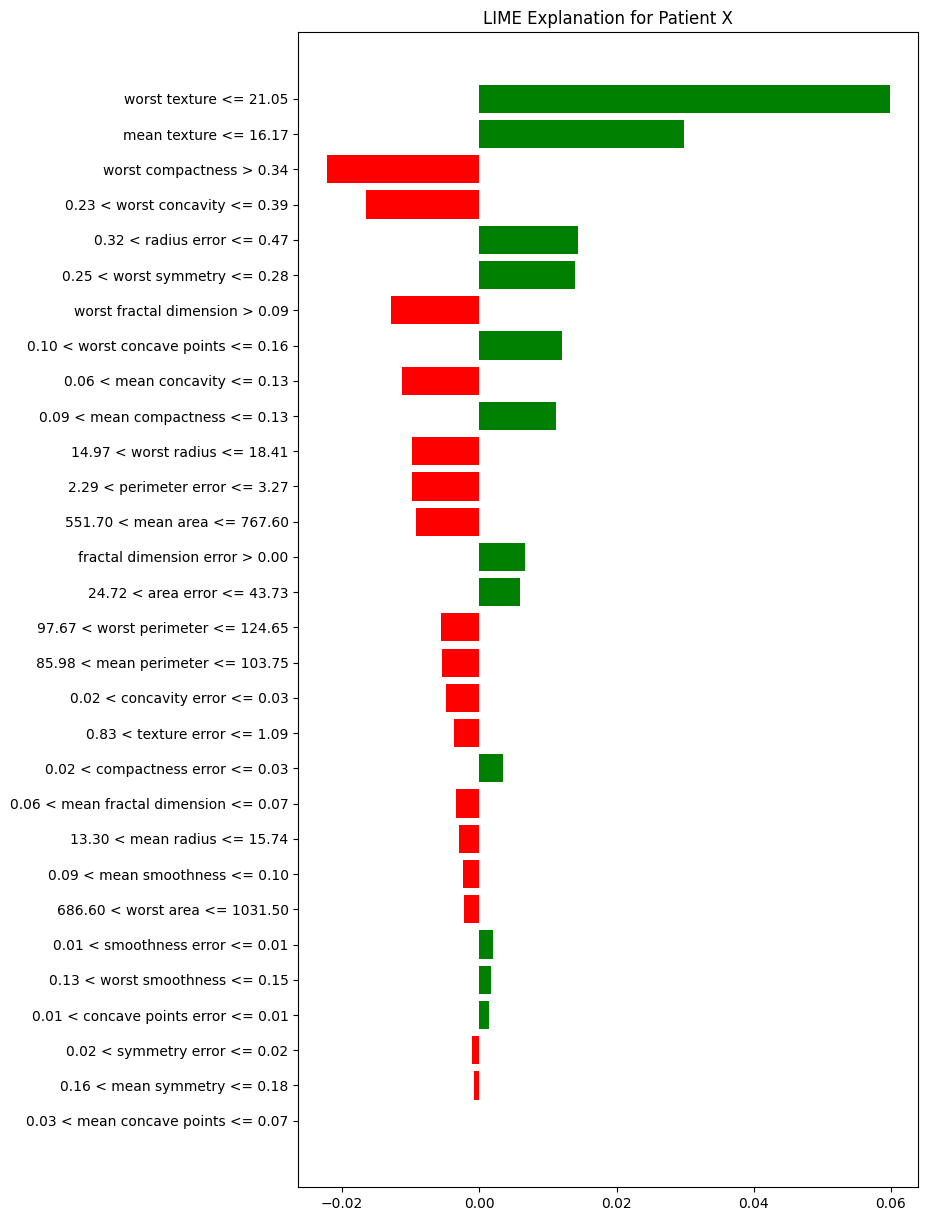

In [ ]:
explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=["Malignant", "Benign"], mode="classification")

exp = explainer.explain_instance(data_row=focus_instance_bc.values[0], predict_fn=model_bc.predict_proba, num_features=X_train.shape[1]) #Explain Patient X

fig = exp.as_pyplot_figure()
fig.set_size_inches(8, 15)
plt.title("LIME Explanation for Patient X")
plt.show()

###ICE

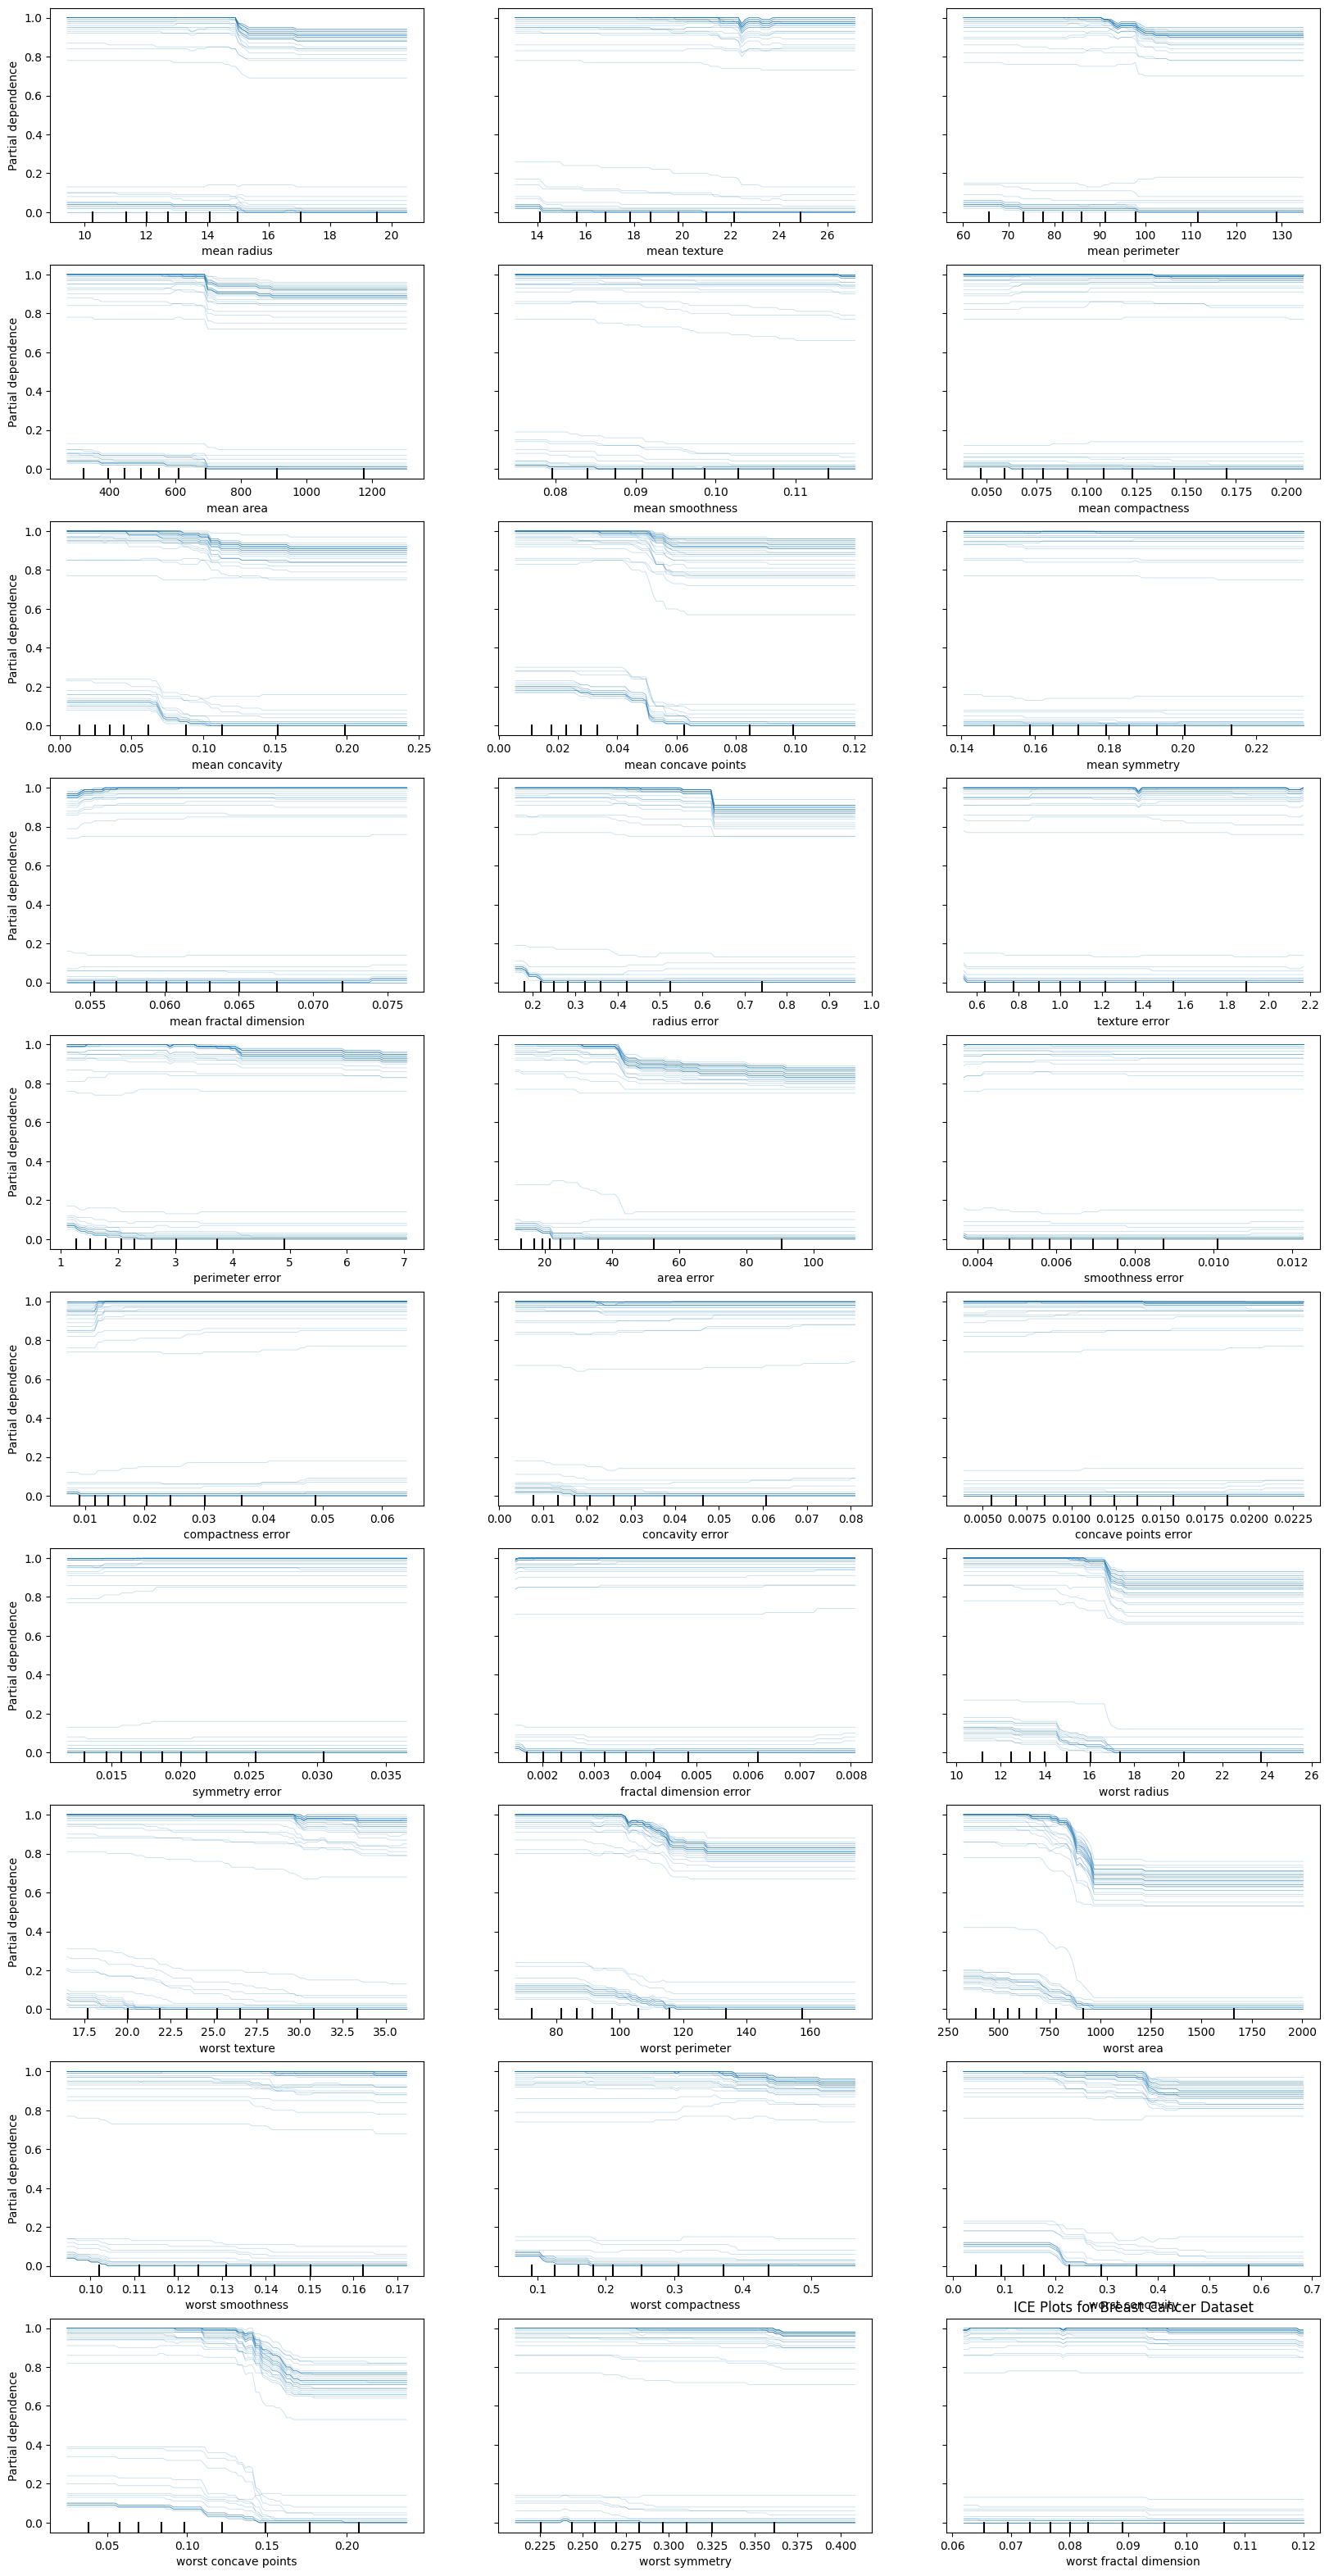

In [ ]:
all_features = X_train.columns.tolist()
fig, ax = plt.subplots(figsize=(20, 40)) #Organize plots into a grid
display = PartialDependenceDisplay.from_estimator(model_bc, X_train, all_features, kind="individual", subsample=50, random_state=42, n_cols=3, ax=ax)
plt.title("ICE Plots for Breast Cancer Dataset")
plt.show()

###Conclusion

The AI tumor diagnostic tool overlooked critical malignant indicators in Patient X, leading to the misclassification and misdiagnosis of a malignant tumor. The LIME plot shows that the tool detected multiple significant indicators of a malignant tumor, including significant compactness, concavity, and dimenstions. However, it placed more weight on features like mean and worst texture which pushed the model to flag the tumor as benign. This shows that the model treated all features as equally important when medical practice indicates that structural abnormalities like concavity and compactness should be a strong indicator for malignancy, regardless of other factors.

The ICE plots indicate that this failure was not isolated to Patient X but is instead a broader issue in the model's behavior. Features that should have increased the liklihood of a malignant classification showed flat or inconsistent effects, meaning the model failed to correctly weigh these critical diagnostic features.

This algorithmic failure caused a significant delay in Patient X's cancer diagnosis, potentially allowing the cancer to progress that a proper medical diagnosis could have prevented. The AI tumor diagnostic tool is fundamentally inaccurate and puts patients at risk for missed cancer diagnoses.